# Data Prep

In [87]:
import os
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


INTERIM_PATH="data/interim/ENIGH"
RAW_PATH="data/raw/DATOS EDUCACION/ENCUESTA NACIONAL DE INGRESOS Y GASTOS EN LOS HOGARES/Extracted"

In [3]:
os.chdir('..')

In [96]:
population_data=[f"{RAW_PATH}/2016/conjunto_de_datos_poblacion_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh_2016_ns.csv"
                ,f"{RAW_PATH}/2018/conjunto_de_datos_poblacion_enigh_2018_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh_2018_ns.csv"
                ,f"{RAW_PATH}/2020/conjunto_de_datos_poblacion_enigh_2020_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh_2020_ns.csv"
                ,f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh2022_ns.csv"]


income_personal_data=[f"{RAW_PATH}/2016/conjunto_de_datos_ingresos_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_ingresos_enigh_2016_ns.csv"
                ,f"{RAW_PATH}/2018/conjunto_de_datos_ingresos_enigh_2018_ns/conjunto_de_datos/conjunto_de_datos_ingresos_enigh_2018_ns.csv"
                ,f"{RAW_PATH}/2020/conjunto_de_datos_ingresos_enigh_2020_ns/conjunto_de_datos/conjunto_de_datos_ingresos_enigh_2020_ns.csv"
                ,f"{RAW_PATH}/2022/conjunto_de_datos_ingresos_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_ingresos_enigh2022_ns.csv"]

bills_personal_data=[f"{RAW_PATH}/2016/conjunto_de_datos_gastospersona_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_gastospersona_enigh_2016_ns.csv"
                ,f"{RAW_PATH}/2018/conjunto_de_datos_gastospersona_enigh_2018_ns/conjunto_de_datos/conjunto_de_datos_gastospersona_enigh_2018_ns.csv"
                ,f"{RAW_PATH}/2020/conjunto_de_datos_gastospersona_enigh_2020_ns/conjunto_de_datos/conjunto_de_datos_gastospersona_enigh_2020_ns.csv"
                ,f"{RAW_PATH}/2022/conjunto_de_datos_gastospersona_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_gastospersona_enigh2022_ns.csv"]



### Bills

In [67]:
# ----- Bills ---------
year=2016
dataframe_list=[]
for file_path in bills_personal_data:
    columns_interest=['folioviv', 'foliohog', 'numren', # Primary key 
                   'clave', 'mes_dia', 'forma_pag1', 'forma_pag2', 'forma_pag3', 'inscrip',
                   'colegia', 'material', 'cantidad', 'gasto', 'costo', 'gasto_tri']

    df=pd.read_csv(file_path)
    df=df[columns_interest]
    
    fill_columns=['cantidad','gasto','costo','gasto_tri']

    for column in fill_columns:
        if df[column].dtype=='object':
            df[column]=df[column].str.replace(' ','0')
    

    formats={
        'clave':'string',
        'cantidad':'float',
        'gasto':'float',
        'costo':'float',
        'gasto_tri':'float',
        'year':'int'
    }

    df['entidad']=df['folioviv']//10**8
    df['year']=year
    
    df=df.astype(formats)
    df=df.rename(columns={'clave':'clave_gasto'})
    dataframe_list.append(df)
    year+=2
    

bills=pd.concat(dataframe_list)

medical_bills=[f"J00{i}" for i in range(1,10)]+[f"J0{i}" for i in range(10,73)]
alcohol_and_cigarettes=[f"A{i}" for i in range(223,241)]



/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_75377/1314447406.py:9: DtypeWarning: Columns (6,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_75377/1314447406.py:9: DtypeWarning: Columns (6,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


In [72]:
bills.head()

,folioviv,foliohog,numren,clave_gasto,mes_dia,forma_pag1,forma_pag2,forma_pag3,inscrip,colegia,material,cantidad,gasto,costo,gasto_tri,entidad,year
0,100691704,1,1,J030,0,0,0,0,0,0,0,0.0,0.0,240.0,0.0,1,2016
1,100691704,1,1,J031,0,0,0,0,0,0,0,0.0,0.0,1200.0,0.0,1,2016
2,100691704,1,1,J032,0,0,0,0,0,0,0,0.0,0.0,4000.0,0.0,1,2016
3,100691704,1,1,J033,0,0,0,0,0,0,0,0.0,0.0,2040.0,0.0,1,2016
4,100691704,1,1,J035,0,0,0,0,0,0,0,0.0,0.0,209.0,0.0,1,2016


### Income

In [100]:
# ----- Income ---------
year=2016
dataframe_list=[]
for file_path in income_personal_data:
    columns_interest=['folioviv', 'foliohog', 'numren' # Primary key 
                     ,'clave','ing_tri']

    df=pd.read_csv(file_path)
    df=df[columns_interest]
    
    

    formats={
        'clave':'string',
        'ing_tri':'float',
        'year':'int'
    }

    df['entidad']=df['folioviv']//10**8
    df['year']=year
    
    df=df.astype(formats)
    df=df.rename(columns={'clave':'clave_ingreso'})
    dataframe_list.append(df)
    year+=2
    

income=pd.concat(dataframe_list)





### Population

In [189]:
# ----- Population --------  
dataframe_list=[]
year=2016
for file_path in population_data:
    
    columns_interest=[
        'folioviv', 'foliohog', 'numren', # Primary key
        'parentesco', 'sexo', 'edad',
        'alfabetism','asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b',
        'forma_b', 'tiene_c', 'forma_c', 'nivelaprob', 'gradoaprob',
        'antec_esc', 'residencia', 'diabetes', 'pres_alta', 'peso','num_trabaj'
    ]

    df=pd.read_csv(file_path)
    df=df[columns_interest]

    fill_column=['nivel','grado','alfabetism','tipoesc','asis_esc','antec_esc','num_trabaj','nivelaprob','gradoaprob']
    for column in fill_column:
        if df[column].dtype=='object':
            df[column]=df[column].str.replace(' ','0')     
        else:
            df[column]=df[column].fillna(0)

    formats={
        'alfabetism':'int64',
        'asis_esc':'int64',
        'nivel':'int64',
        'grado':'int64',
        'tipoesc':'int64',
        'nivelaprob':'int64',
        'gradoaprob':'int64'
    }
    df['entidad']=df['folioviv']//10**8
    df['year']=year

    bins = [1901,1924,1945, 1964, 1980, 1996, 2012, 2024 ]  # Generation birth ranges
    labels = ['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha']  # Generation labels

    df['año_nacimiento']=df['year']-df['edad']
    df['generacion'] = pd.cut(df['año_nacimiento'], bins=bins, labels=labels, right=True)
    df.drop(columns='año_nacimiento', inplace=True)

    df=df.astype(formats)
    dataframe_list.append(df)
    year+=2

population=pd.concat(dataframe_list)

entity_catalogue=f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/catalogos/entidad.csv"
entity=pd.read_csv(entity_catalogue,encoding='Windows-1252')

population=pd.merge(population,entity, on='entidad',how='inner')
population=population.rename(columns={'descripcion':'nombre_entidad'})

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_75377/1682979513.py:14: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_75377/1682979513.py:14: DtypeWarning: Columns (10,80,81,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_75377/1682979513.py:14: DtypeWarning: Columns (10,11,12,13,14,15,16,17,82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_75377/1682979513.py:14: DtypeWarning: Columns (82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


In [69]:
population

,folioviv,foliohog,numren,parentesco,sexo,edad,alfabetism,asis_esc,nivel,grado,...,gradoaprob,antec_esc,residencia,diabetes,pres_alta,peso,num_trabaj,entidad,year,generacion
0,100068001,1,2,201,2,71,2,2,0,0,...,0,0.0,1.0,2.0,1.0,1.0,0.0,1,2016,Silent
1,100068002,1,1,101,1,64,1,2,0,0,...,3,0.0,1.0,2.0,2.0,2.0,0.0,1,2016,Baby Boomer
2,100068002,1,2,201,2,61,1,2,0,0,...,6,0.0,1.0,2.0,1.0,1.0,0.0,1,2016,Baby Boomer
3,100068002,1,3,301,2,24,1,2,0,0,...,5,3.0,1.0,1.0,1.0,1.0,2.0,1,2016,Milenial
4,100068003,1,1,101,1,82,1,2,0,0,...,0,0.0,1.0,1.0,1.0,1.0,1.0,1,2016,Silent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309679,3260797910,1,1,101,1,63,1,2,0,0,...,3,0,32,1,1,1,1,32,2022,Baby Boomer
309680,3260797910,1,2,201,2,59,1,2,0,0,...,3,0,32,1,1,1,1,32,2022,Baby Boomer
309681,3260797912,1,1,101,1,29,1,2,0,0,...,5,3,32,2,1,1,1,32,2022,Milenial
309682,3260797912,1,2,201,2,30,1,2,0,0,...,5,3,32,2,1,1,1,32,2022,Milenial


In [188]:
entity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entidad      32 non-null     int64 
 1   descripcion  32 non-null     object
dtypes: int64(1), object(1)
memory usage: 644.0+ bytes


# Barplots

### Average Trimester Income

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_75377/3952852932.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=df.groupby(['year','generacion'],as_index=False)['ing_tri'].mean()


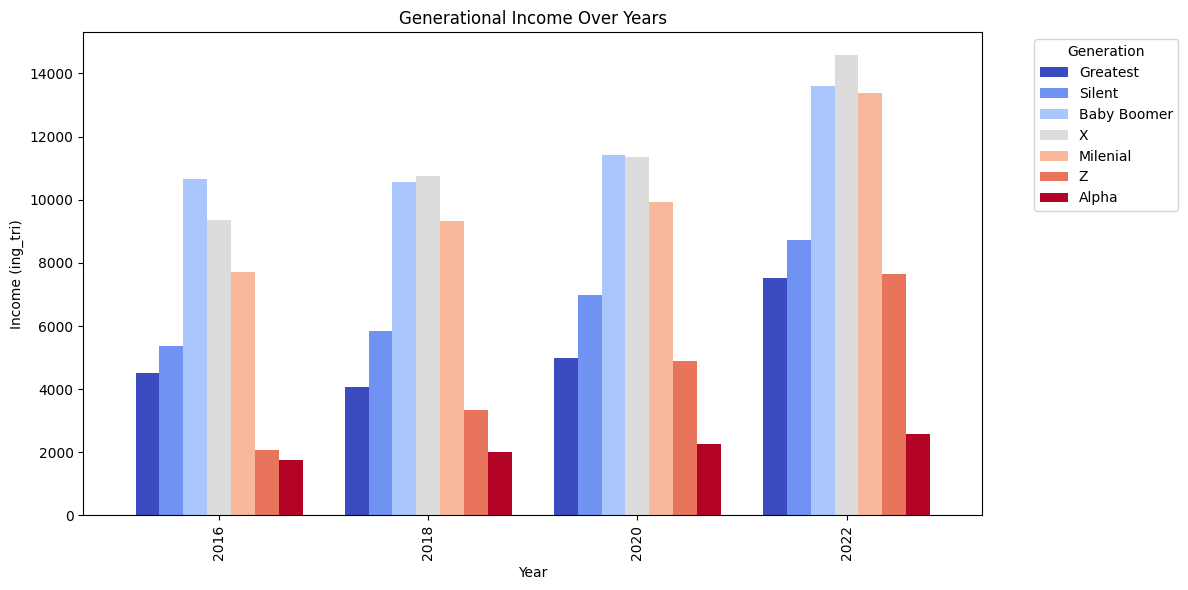

In [200]:
df=pd.merge(income,population, on=['folioviv','foliohog','numren','year','entidad'], how='inner')

#is_year=df['year']==year
#df=df[is_year]

df=df[['folioviv','foliohog','sexo','numren','edad','generacion',
                'entidad','ing_tri','alfabetism','year']]
                
df['ing_tri_total']=df.groupby(['folioviv','foliohog','numren','year'])['ing_tri'].transform('sum')

data=df.groupby(['year','generacion'],as_index=False)['ing_tri'].mean()
pivot_df = data.pivot(index='year', columns='generacion', values='ing_tri')

# Plot
pivot_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', width=0.8)

# Formatting the plot
plt.title("Generational Income Over Years")
plt.ylabel("Income (ing_tri)")
plt.xlabel("Year")
plt.legend(title="Generation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Average Trimester Bills

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_75377/2524980293.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=df.groupby(['year','generacion'],as_index=False)['gasto_tri'].mean()


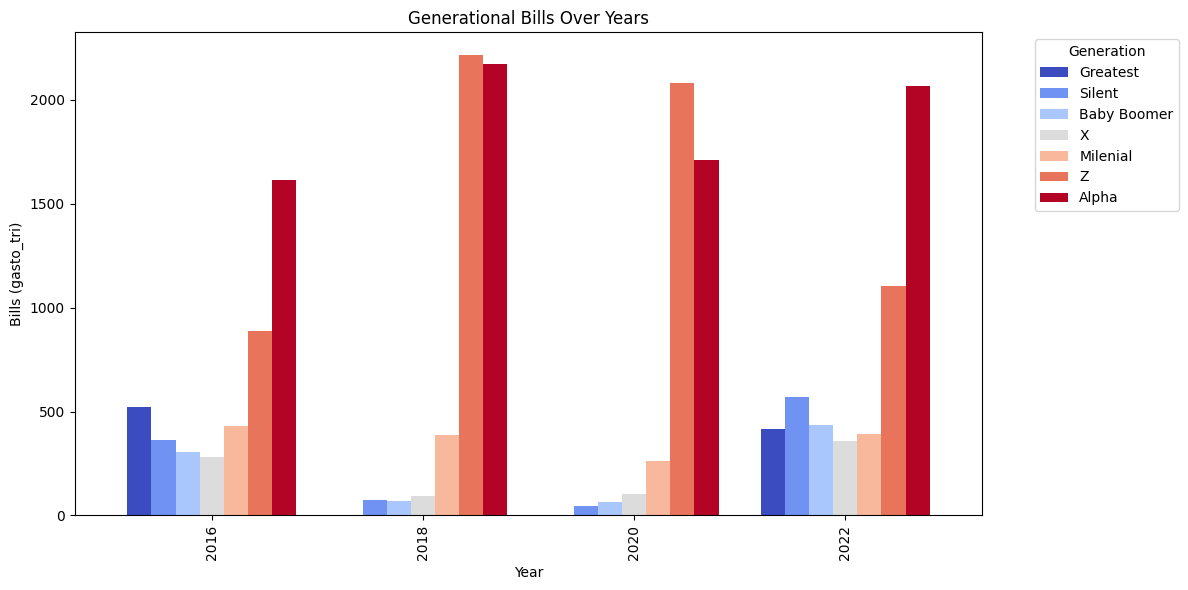

In [203]:
df=pd.merge(bills,population, on=['folioviv','foliohog','numren','year','entidad'], how='inner')

#is_year=df['year']==year
#df=df[is_year]

df=df[['folioviv','foliohog','sexo','numren','edad','generacion',
                'entidad','gasto_tri','alfabetism','year']]
                
df['gasto_tri_total']=df.groupby(['folioviv','foliohog','numren','year'])['gasto_tri'].transform('sum')

data=df.groupby(['year','generacion'],as_index=False)['gasto_tri'].mean()
pivot_df = data.pivot(index='year', columns='generacion', values='gasto_tri')

# Plot
pivot_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', width=0.8)

# Formatting the plot
plt.title("Generational Bills Over Years")
plt.ylabel("Bills (gasto_tri)")
plt.xlabel("Year")
plt.legend(title="Generation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Grade approved distribution

entidad=1
df=population[['folioviv','foliohog','numren','gradoaprob','year','entidad','sexo','nombre_entidad']]

is_entidad=df['entidad']==entidad

df=df[ is_entidad ] 
df=df.groupby(['nombre_entidad','year'],as_index=False)['gradoaprob'].value_counts(normalize=True)





### Literacy

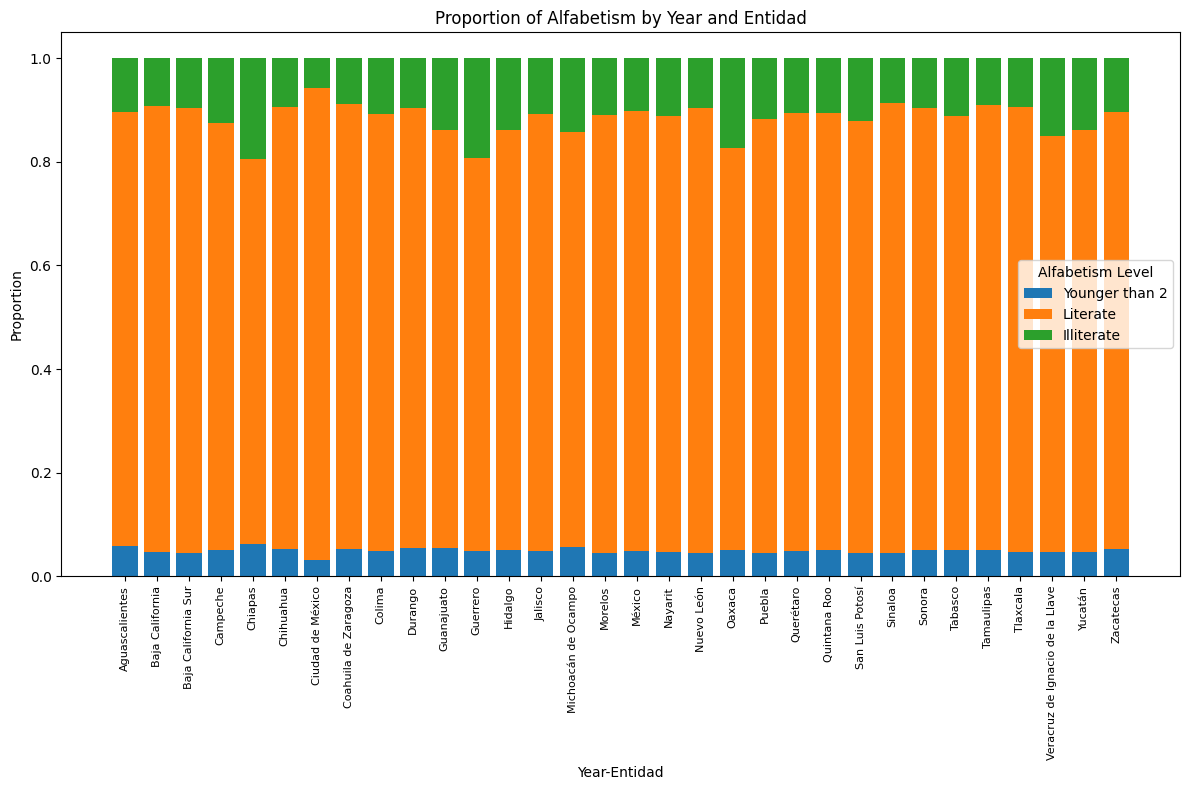

In [199]:
year=2016
df=population[['folioviv','foliohog','numren','alfabetism','year','entidad','sexo','nombre_entidad']]

df=df.groupby(['nombre_entidad','year'],as_index=False)['alfabetism'].value_counts(normalize=True)
is_year=df['year']==year

df=df[is_year]
pivot_df = df.pivot_table(
    index=['nombre_entidad', 'year'], 
    columns='alfabetism', 
    values='proportion', 
    aggfunc='sum'
).reset_index()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot stacked bar for each alfabetism level
alfabetism_levels = pivot_df.columns[2:]  # Get all alfabetism levels (0, 1, 2, etc.)
bottom = None

labels={0:'Younger than 2',
        1:'Literate',
        2:'Illiterate'}

for level in alfabetism_levels:
    label=labels[level]
    ax.bar(
        pivot_df['nombre_entidad'].astype(str),
        pivot_df[level],
        label=f'{label}',
        bottom=bottom,
    )
    # Update the bottom for stacking
    bottom = pivot_df[level] if bottom is None else bottom + pivot_df[level]

# Customize the plot
ax.set_title("Proportion of Alfabetism by Year and Entidad")
ax.set_xlabel("Year-Entidad")
ax.set_ylabel("Proportion")
ax.legend(title="Alfabetism Level")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

# Maps

In [205]:

def heat_map(dataframe,columns,year):
    df=dataframe[columns]



    df_t=df.groupby('entidad')['gradoaprob'].value_counts(normalize=True).reset_index(name='proportion')

    carpeta_descarga='data/raw/DATOS GEOREFERENCIALES/2023'
    mapa_a = f'{carpeta_descarga}/2023_1_00_ENT.shp'
    map_a = gpd.read_file(mapa_a)
    map_a['CVE_ENT']=map_a['CVE_ENT'].astype('int')

    graph_df=pd.merge(df_t,map_a,left_on='entidad',right_on='CVE_ENT',how='inner')

    is_gradoaprob=graph_df['gradoaprob']==3
    data=graph_df[is_gradoaprob]
    data=gpd.GeoDataFrame(data, geometry='geometry')
    fig, ax = plt.subplots(figsize=(12, 8))

    data.plot(
        column='proportion',
        cmap='viridis',       # Colormap for visualizing proportions
        linewidth=0.5,         # Line thickness for borders
        edgecolor='black',      # Border color between regions
        legend=True,            # Add a legend to show the color scale
        ax=ax                   # Plot on the provided axes
    )

    ax.set_axis_off()  # Remove axes for a clean map
    plt.title("Proportion Map by Entidad")  # Optional: Add a title
    plt.show()

In [ ]:
population_columns= ['folioviv', 'foliohog', 'numren', 'entidad','sexo', 'edad','generacion','alfabetism', 'asis_esc', 'nivel','grado', 'tipoesc','nivelaprob', 'gradoaprob']
heat_map(population_columns)

# Line Graphs

### Literacy 

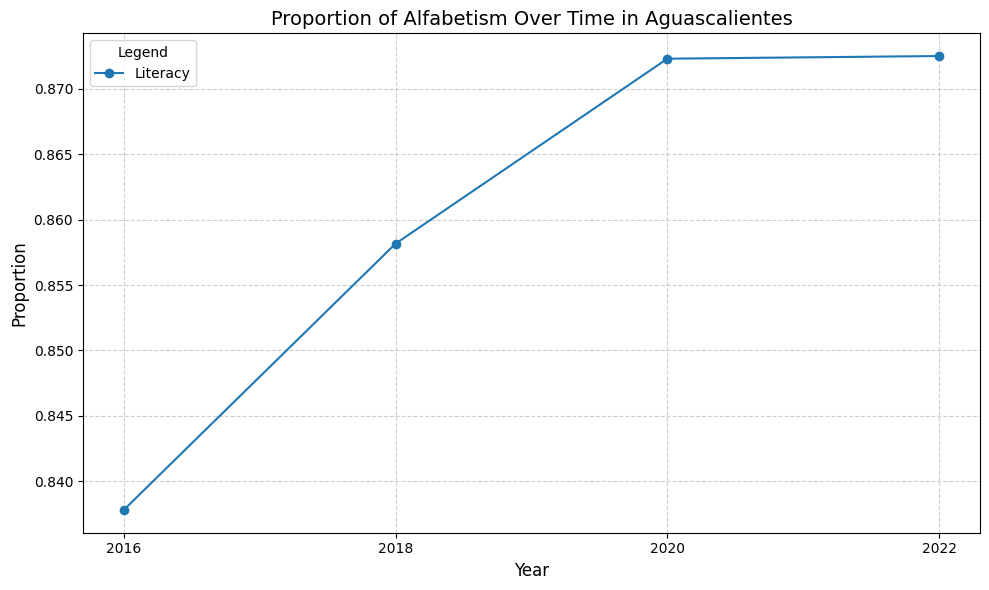

In [233]:
entidad=1
df=population[['folioviv','foliohog','numren','alfabetism','year','entidad','sexo','nombre_entidad']]

is_literate= df['alfabetism']==1
is_entidad=df['entidad']==entidad

df=df[ is_entidad ] 
df=df.groupby(['nombre_entidad','year'],as_index=False)['alfabetism'].value_counts(normalize=True)
df=df[ df['alfabetism']==1 ]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Filter for a specific `alfabetism` level, e.g., level 1
for alfabetism_level in df['alfabetism'].unique():
    subset = df[df['alfabetism'] == alfabetism_level]
    ax.plot(
        subset['year'], 
        subset['proportion'], 
        marker='o', 
        label=f'Literacy'
    )

# Customize the plot
ax.set_title(f"Proportion of Alfabetism Over Time in {df['nombre_entidad'][0]}", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)
ax.set_xticks(df['year'])
ax.legend(title="Legend")
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

### Grade 

In [234]:
entidad=1
df=population[['folioviv','foliohog','numren','gradoaprob','year','entidad','sexo','nombre_entidad']]

is_entidad=df['entidad']==entidad

df=df[ is_entidad ] 
df=df.groupby(['nombre_entidad','year'],as_index=False)['gradoaprob'].value_counts(normalize=True)





In [235]:
df

,nombre_entidad,year,gradoaprob,proportion
0,Aguascalientes,2016,3,0.405202
1,Aguascalientes,2016,2,0.131771
2,Aguascalientes,2016,1,0.117046
3,Aguascalientes,2016,6,0.116079
4,Aguascalientes,2016,0,0.108340
5,Aguascalientes,2016,5,0.060942
6,Aguascalientes,2016,4,0.060619
7,Aguascalientes,2018,3,0.414439
8,Aguascalientes,2018,2,0.129422
9,Aguascalientes,2018,1,0.113785
